# Introduction
In this notebook, we will try to do clustering for a wine customer dataset. We will use the Gaussian Mixture Models and Kmeans model. The dataset contains the results of a chemical analysis of wines grown in the same region in Italy but derived from three different cultivars. The analysis determined the quantities of 13 constituents found in each of the three types of wines.
## Reading the dataset

In [304]:
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.mixture import GaussianMixture
from sklearn.preprocessing import StandardScaler

df = pd.read_csv('Wine.csv')
df.head(n=10)

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,Customer_Segment
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,1
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,1
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,1
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,1
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,1
5,14.20,1.76,2.45,15.2,112,3.27,3.39,0.34,1.97,6.75,1.05,2.85,1450,1
6,14.39,1.87,2.45,14.6,96,2.50,2.52,0.30,1.98,5.25,1.02,3.58,1290,1
7,14.06,2.15,2.61,17.6,121,2.60,2.51,0.31,1.25,5.05,1.06,3.58,1295,1
8,14.83,1.64,2.17,14.0,97,2.80,2.98,0.29,1.98,5.20,1.08,2.85,1045,1
9,13.86,1.35,2.27,16.0,98,2.98,3.15,0.22,1.85,7.22,1.01,3.55,1045,1


In [305]:
df.describe()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,Customer_Segment
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258,1.938202
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474,0.775035
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000,1.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000,1.000000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000,2.000000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000,3.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000,3.000000


In [306]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Alcohol               178 non-null    float64
 1   Malic_Acid            178 non-null    float64
 2   Ash                   178 non-null    float64
 3   Ash_Alcanity          178 non-null    float64
 4   Magnesium             178 non-null    int64  
 5   Total_Phenols         178 non-null    float64
 6   Flavanoids            178 non-null    float64
 7   Nonflavanoid_Phenols  178 non-null    float64
 8   Proanthocyanins       178 non-null    float64
 9   Color_Intensity       178 non-null    float64
 10  Hue                   178 non-null    float64
 11  OD280                 178 non-null    float64
 12  Proline               178 non-null    int64  
 13  Customer_Segment      178 non-null    int64  
dtypes: float64(11), int64(3)
memory usage: 19.6 KB


There is no need, in data preprocessing as there are no missing data and every column is number based, so we will not have to encode it further.

In [307]:
df['Customer_Segment'].unique()

array([1, 2, 3])

So, there are 3 customer segments. 
# Data visualization

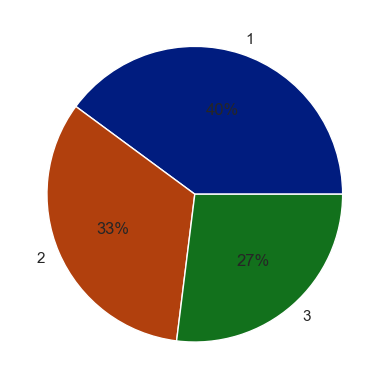

In [308]:
import seaborn as sns
import matplotlib.pyplot as plt

palette_color = sns.color_palette('dark')

plt.pie(df['Customer_Segment'].value_counts(), labels=df['Customer_Segment'].unique(), colors=palette_color,
        autopct='%.0f%%')

plt.show()

There is no segment with more than 50% entries which is good for our study.
### Confusion matrix
Let's see which columns influence most the segments.

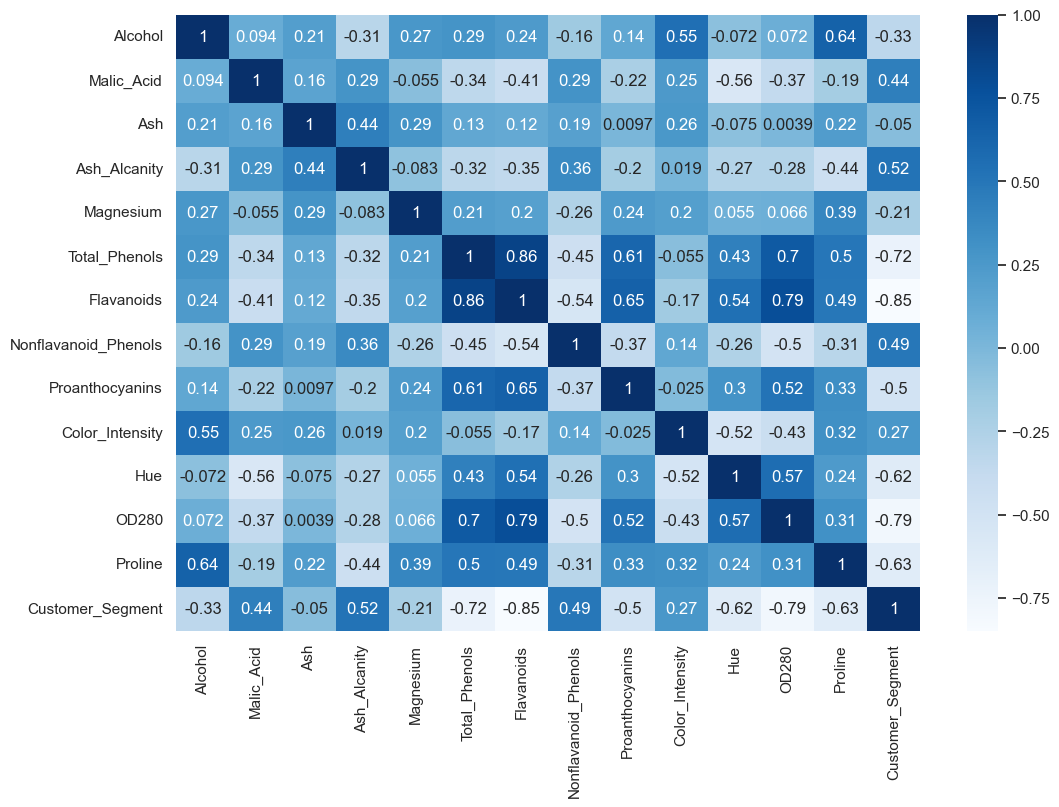

In [309]:
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, cmap=plt.cm.Blues);

Most columns have negative correlation with customer segment. Some of the most impactful columns are: flavanoids, OD280, Total_Phenols, Proline and Hue. 
Now probably it is the right to understand what these measures are. 
- **Flavanoids** are compounds found in many plant products, including teas, citrus fruits, and vegetables. They have antioxidant properties and may lower your risk of heart attack or stroke. The flavonoids present in red wine include a wide range of compounds that affect colour, taste and mouth feel of the wine. Flavonoids are the main polyphenols present in red wine by weight, and constitute about 80 to 90% of total polyphenols. Flavonoids are derived primarily from the skin and or seed of red grapes.
- **OD280** is a measure of sample purity. Nucleic acid contamination in a protein sample should be kept to a minimum, as it can interfere with the activity of nucleic acid-binding proteins like Cas9. Nucleic acids absorb light at 260 nm and proteins absorb at 280 nm. Therefore, a high value indicates the presence of more nucleic acids and a low value indicates the presence of proteins. Loading in as high a salt buffer as possible will help minimize the presence of nucleic acids early on.

- **Phenol** is an aromatic organic compound, usually in the form of colourless or white crystals. The phenolics have a number of important functions in wine, affecting the tastes of bitterness and astringency, especially in red wine. Second, the color of red wine is caused by phenolics. Third, the phenolics are the key wine preservative and the basis of long aging.

- **Proline** is an amino acid naturally found in grapes that has recently been shown to boost viscosity, sweetness and flavour of red wine. High-proline grapes are associated with warmer climates and riper grapes.

- **Hue** - the color intensity of wine.

Looking forward to see the corelation between these features. 


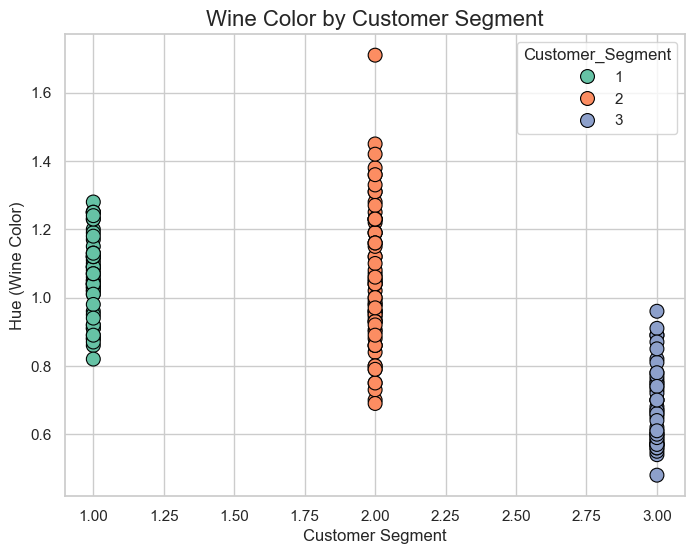

In [310]:
sns.set(style="whitegrid")

plt.figure(figsize=(8, 6))

sns.scatterplot(data=df, x='Customer_Segment', y='Hue', hue='Customer_Segment', palette='Set2', s=100,
                edgecolor='black')

# Customize the plot with a title and labels
plt.title('Wine Color by Customer Segment', fontsize=16)
plt.xlabel('Customer Segment', fontsize=12)
plt.ylabel('Hue (Wine Color)', fontsize=12)
# Show the plot
plt.show()

The first segment, prefers wine with hue in midrange(between 0.8 and 1.3), the second segment drinks wine in a broader range of hue and third segment in the lower hues. Hue can represent the climate the grapes were raised and different type of wines. Lower hue means wine has more of a pinkish color while higher hue means that the wine has a more bold red color. Also lighter could mean cooler climate and bolder come from a warmer climate. In this case, I have some hypothesis, either first segment is more expensive wine or for customers that love red wine specifically as the hue is more controlled and bolder, while the second is some broader customer segment or some cheaper wine as the hue has a wide range compared to 2 other segments and the 3rd segment is either some wine made from grapes from colder regions or it is for people that love lighter wine generally.

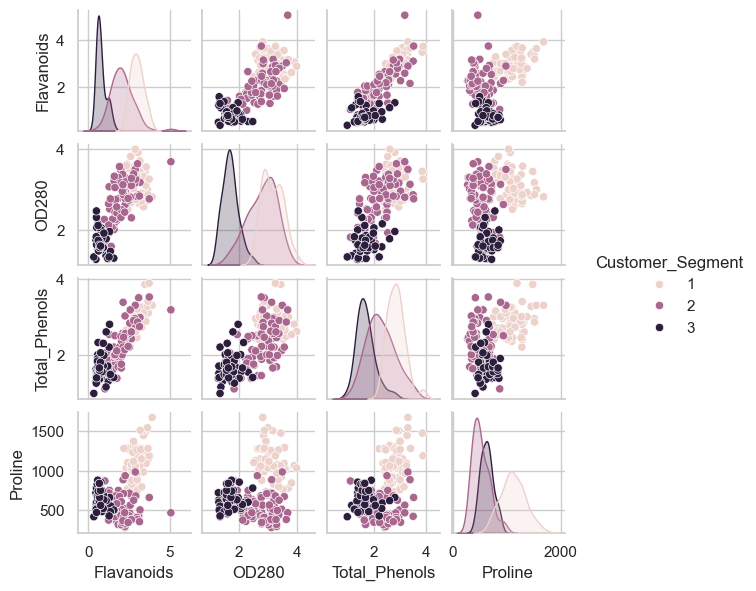

In [311]:
sns.pairplot(data=df[['Flavanoids', 'OD280', 'Total_Phenols', 'Proline', 'Customer_Segment']], hue='Customer_Segment',
             height=1.5)


In this pairplot, we can see that wines in first segment have higher flavanoids, phenols, proline levels and the overall od280 purity score is higher, while second segment is lower and 3rd segment has the lowest, except the proline levels where the levels of second and third segment are similar which means that these segments have grapes from colder regions.

<Axes: xlabel='Customer_Segment', ylabel='Proline'>

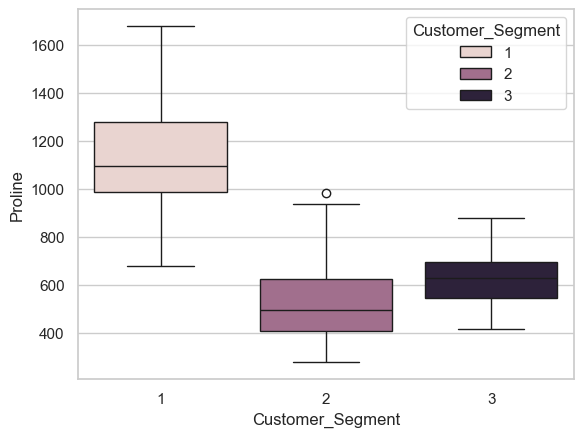

In [312]:
sns.boxplot(data=df, x='Customer_Segment', y='Proline', hue='Customer_Segment')

This can be clearly seen here, which reconfirms that first segment is a more premium class of wines. The similar levels between second and third segments, probably will make it harder for the models to cluster/categorize them.
# Splitting data

In [313]:
df.columns

Index(['Alcohol', 'Malic_Acid', 'Ash', 'Ash_Alcanity', 'Magnesium',
       'Total_Phenols', 'Flavanoids', 'Nonflavanoid_Phenols',
       'Proanthocyanins', 'Color_Intensity', 'Hue', 'OD280', 'Proline',
       'Customer_Segment'],
      dtype='object')

In [314]:
from sklearn.model_selection import train_test_split
X = df[['Alcohol', 'Malic_Acid', 'Ash', 'Ash_Alcanity', 'Magnesium',
       'Total_Phenols', 'Flavanoids', 'Hue', 'OD280', 'Proline']]
y = df['Customer_Segment']
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.30, random_state=42
)

## Feature scaling
Because we got data between segments that has unclear boundaries between segments, we can benefit from feature scaling.

In [315]:
scaler = StandardScaler().set_output(transform='pandas')
X_scaled = scaler.fit_transform(X_train)

## PCA
Further, I will want to plot our clusters so for that, I will use PCA to reduce the number of components to 2.

In [316]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Finding the number of clusters using Silhouette score.
Next, we will calculate Silhouette score for Kmeans and GMM for a number of clusters and we will get the best n for each algorithm.
## GMM

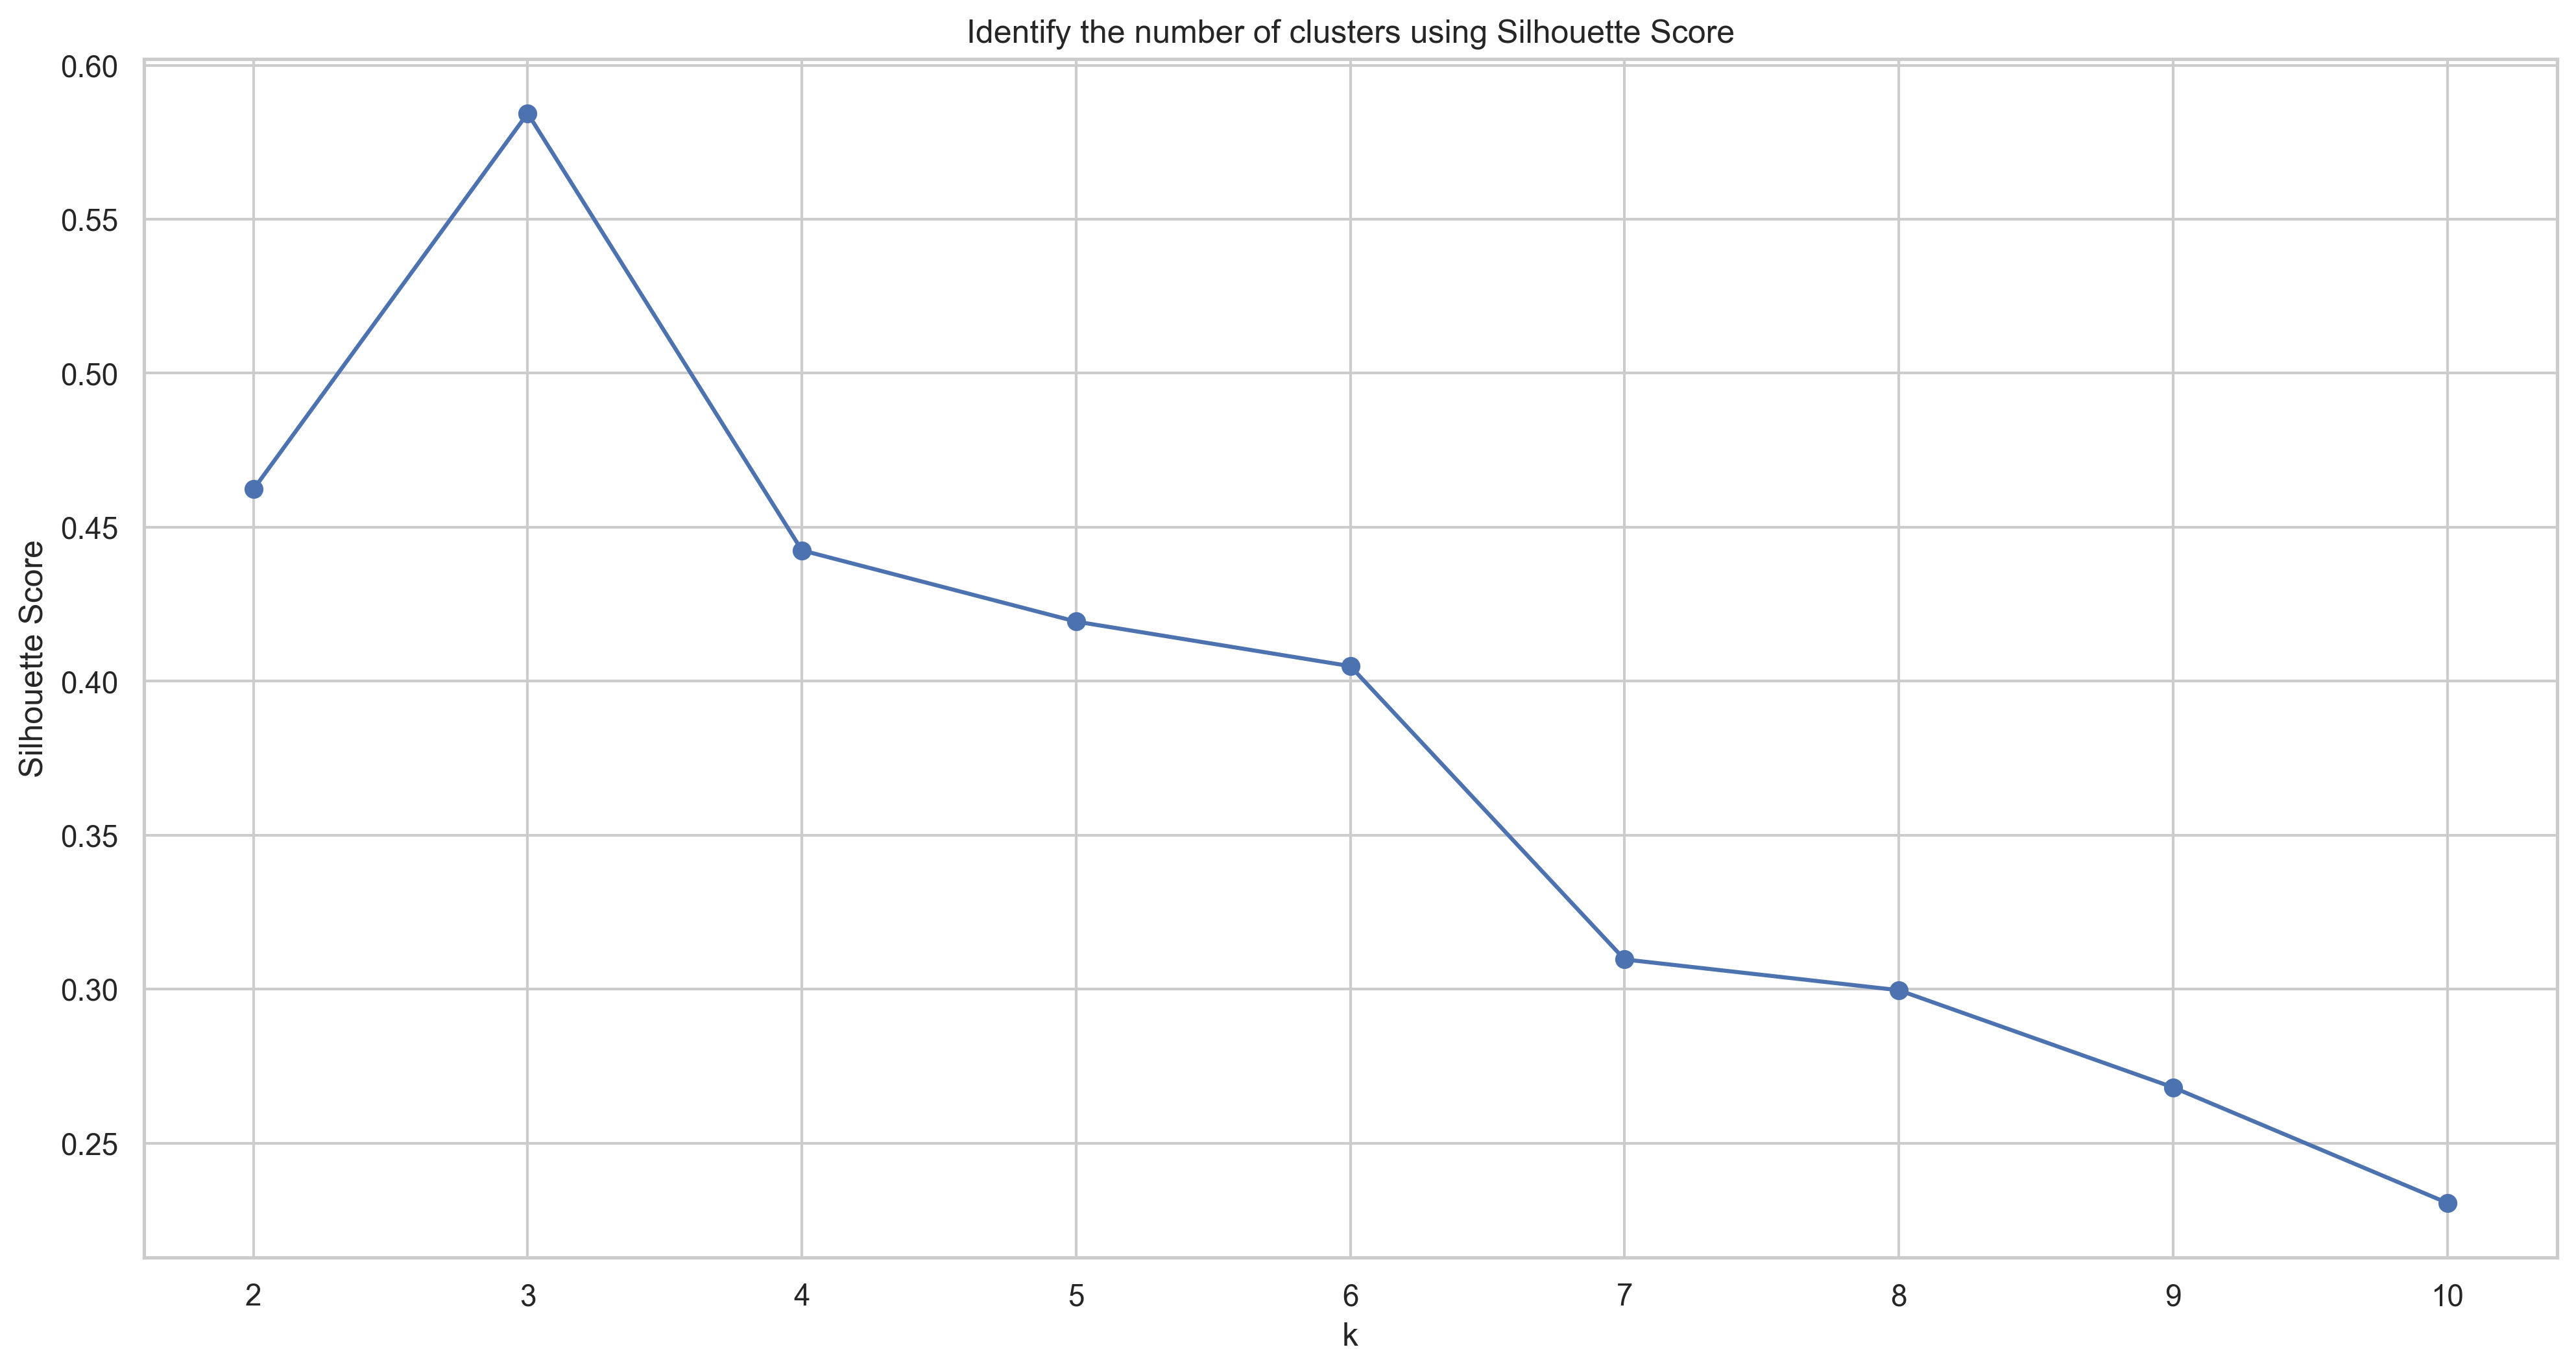

In [317]:
S=[]

K=range(2,11)

for k in K:
    model = GaussianMixture(n_components=k, random_state=42)
    labels = model.fit_predict(X_pca)
    S.append(silhouette_score(X_pca, labels, metric='euclidean', random_state=42))

plt.figure(figsize=(16,8), dpi=300)
plt.plot(K, S, 'bo-')
plt.xlabel('k')
plt.ylabel('Silhouette Score')
plt.title('Identify the number of clusters using Silhouette Score')
plt.show()


## Kmeans

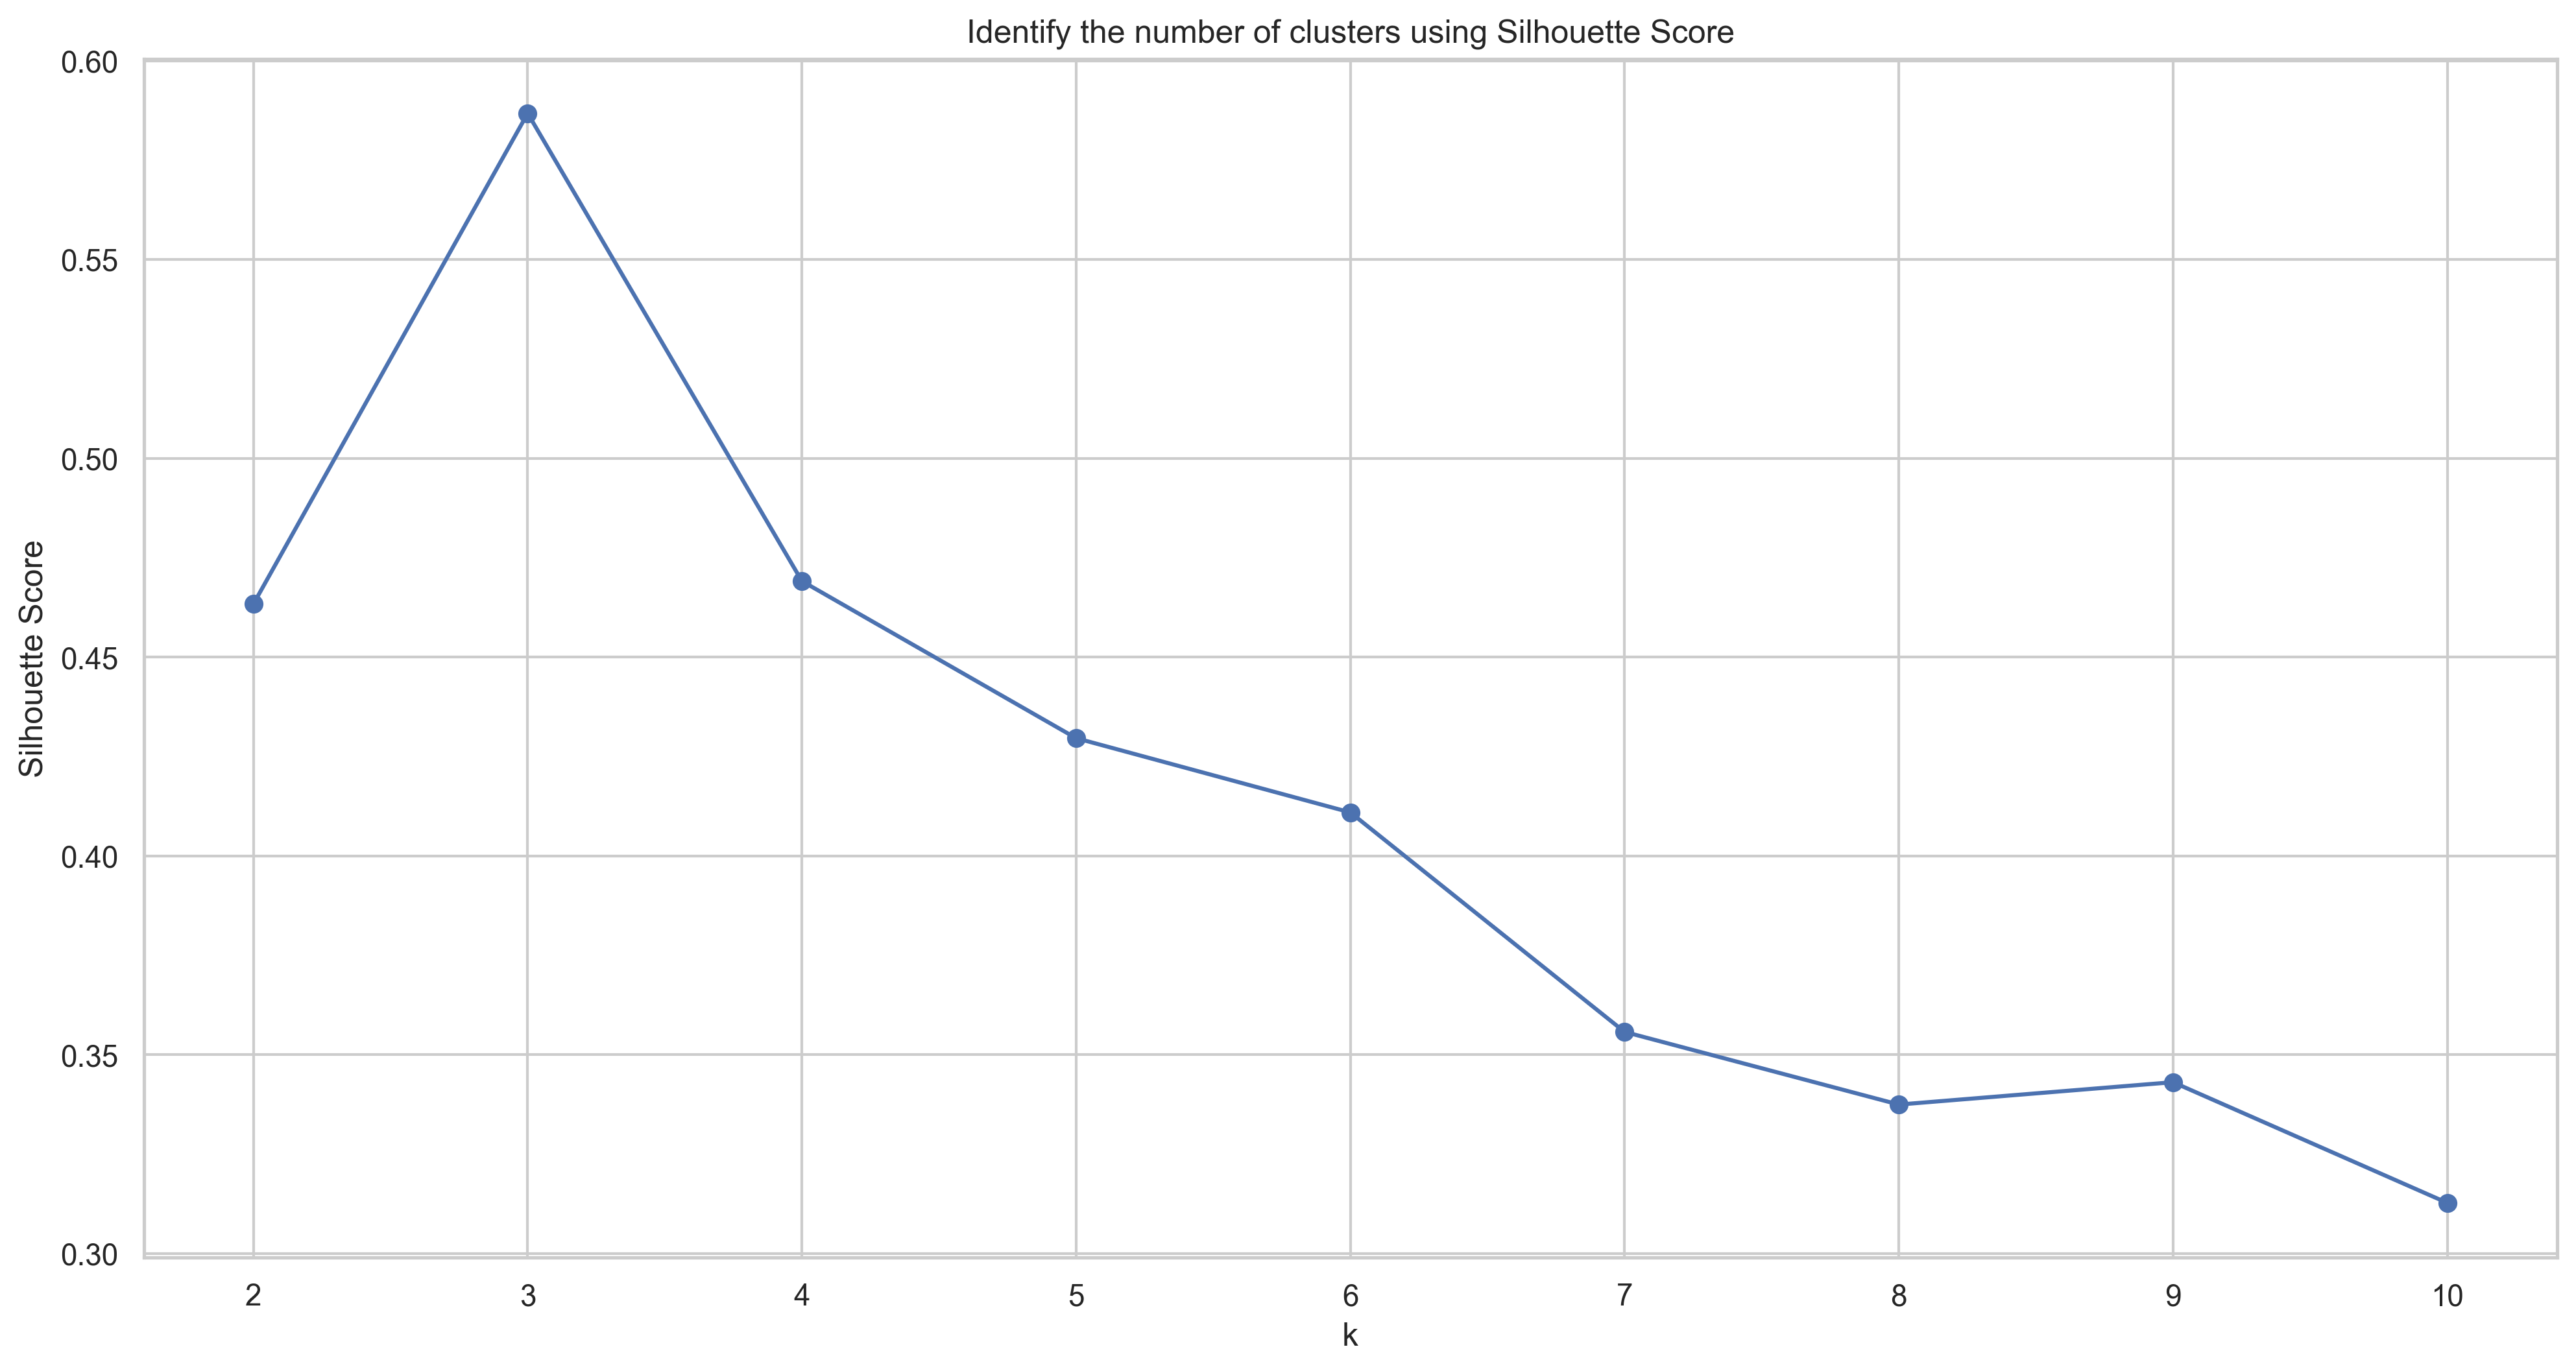

In [318]:
S=[]

K=range(2,11)

for k in K:
    model = KMeans(n_clusters=k, random_state=42)
    labels = model.fit_predict(X_pca)
    S.append(silhouette_score(X_pca, labels, metric='euclidean', random_state=42))

plt.figure(figsize=(16,8), dpi=300)
plt.plot(K, S, 'bo-')
plt.xlabel('k')
plt.ylabel('Silhouette Score')
plt.title('Identify the number of clusters using Silhouette Score')
plt.show()


For both of our algorithms we got the highest score for 3 clusters: KMeans with 0.57 and GMM with 0.58. Which is convenient for us, as that is clearly the number of cluster we actually have.
# Clustering the data with both algorithms
## Kmeans

In [319]:
# Choose the optimal number of clusters (for demonstration, let's assume we selected 3)
optimal_kmeans_clusters = 3

# KMeans clustering with optimal clusters
kmeans = KMeans(n_clusters=optimal_kmeans_clusters, random_state=42)
kmeans_labels = kmeans.fit_predict(X_scaled)
kmeans_labels

array([0, 2, 2, 1, 2, 1, 0, 2, 2, 0, 1, 1, 1, 0, 1, 1, 1, 0, 2, 1, 0, 0,
       1, 0, 2, 2, 1, 0, 1, 1, 2, 1, 1, 0, 2, 2, 2, 1, 2, 2, 2, 0, 0, 1,
       2, 0, 0, 2, 1, 1, 2, 0, 0, 2, 0, 2, 2, 2, 1, 1, 0, 1, 0, 1, 1, 2,
       2, 1, 1, 1, 2, 1, 0, 0, 2, 2, 0, 0, 0, 2, 1, 1, 2, 0, 0, 1, 2, 0,
       0, 0, 0, 2, 1, 2, 1, 0, 1, 1, 2, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0,
       0, 2, 2, 2, 2, 2, 1, 0, 1, 2, 2, 1, 2, 2], dtype=int32)

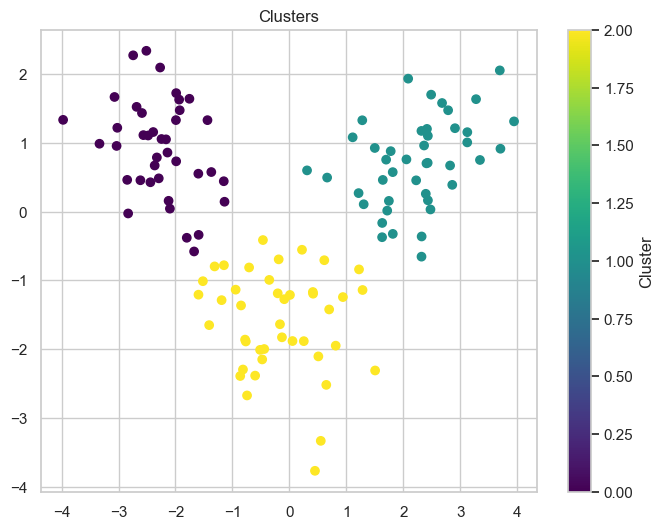

In [320]:
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=kmeans_labels, cmap='viridis')
plt.title('Clusters')
plt.colorbar(label='Cluster')
plt.show()

## GMM

In [321]:
optimal_gmm_clusters = 3
# GMM clustering with optimal clusters
gmm = GaussianMixture(n_components=optimal_gmm_clusters, random_state=42)
gmm_labels = gmm.fit_predict(X_scaled)
gmm_labels

array([0, 2, 2, 1, 2, 1, 0, 2, 2, 0, 1, 1, 1, 0, 1, 1, 1, 0, 2, 1, 0, 0,
       1, 0, 2, 2, 1, 0, 1, 1, 2, 1, 1, 0, 1, 2, 2, 1, 2, 2, 2, 0, 0, 1,
       2, 0, 0, 2, 1, 1, 2, 0, 0, 2, 0, 2, 2, 2, 1, 1, 0, 1, 0, 1, 1, 2,
       2, 1, 1, 1, 2, 1, 0, 0, 2, 2, 0, 0, 0, 2, 1, 1, 2, 0, 0, 1, 2, 0,
       0, 0, 0, 2, 1, 2, 1, 0, 1, 1, 2, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0,
       0, 2, 2, 2, 2, 2, 1, 0, 1, 2, 2, 1, 2, 2])

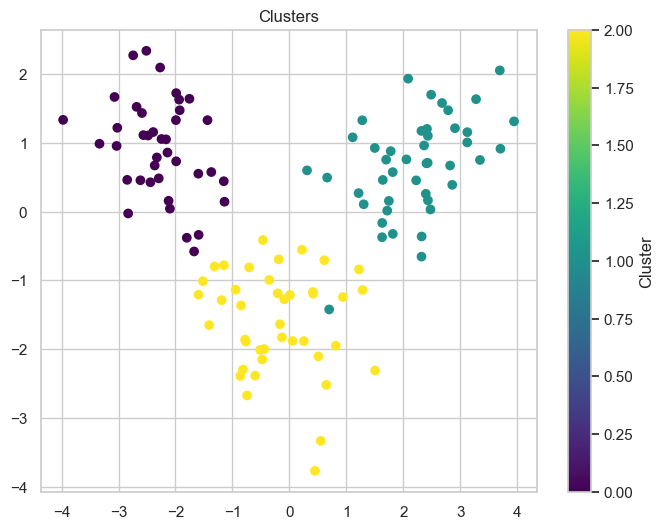

In [322]:
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=gmm_labels, cmap='viridis')
plt.title('Clusters')
plt.colorbar(label='Cluster')
plt.show()

We have got, similar outputs for both of our algorithms tho GMM seems to have one outsider compared KMeans but looking back at our Hue/Customer_segment plot, there also seems to be an "outsider" so I think that GMM could be more accurate in this case.

# Extracting the means from GMM of the clusters.

In [323]:
gmm_means = gmm.means_
pd.DataFrame(gmm_means, columns=X_scaled.columns)

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Hue,OD280,Proline
0,0.055617,0.929342,0.187914,0.505766,-0.090703,-0.938310,-1.119289,-1.068483,-1.190094,-0.372495
1,0.797983,-0.386105,0.345022,-0.602439,0.559128,0.882183,0.985721,0.479978,0.780460,1.077293
2,-0.907992,-0.473986,-0.549097,0.162329,-0.512359,-0.048892,0.013041,0.506315,0.300562,-0.798324


# Extracting the centroids from the KMeans algorithm 

In [324]:
kmeans_centroids = kmeans.cluster_centers_
pd.DataFrame(kmeans_centroids, columns=X_scaled.columns)

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Hue,OD280,Proline
0,0.060304,0.931264,0.190500,0.509118,-0.092615,-0.938775,-1.121027,-1.072445,-1.194064,-0.370359
1,0.821578,-0.383161,0.362856,-0.611209,0.595936,0.904267,0.995684,0.471392,0.781177,1.102470
2,-0.897136,-0.472462,-0.548388,0.153010,-0.524126,-0.054078,0.021563,0.513227,0.308997,-0.784814


# Conclusion
In this study, I clearly found out something new about wine and what metrics makes it better and also I learn about new topic such as clustering. I learned about 2 models GaussianMixture and Kmeans and seen their difference. Clustering is not a supervised method learning, but it can be used to solve the same problems that classification models do. Also, I've seen how useful can PCA can be, as it helped me to plot easier by reducing the number of components. 